In [5]:
from transformers import AutoProcessor,ASTModel
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import tqdm

In [2]:
def pad_or_truncate_sequence(sequence, max_length):
    sequence = torch.tensor(sequence)
    current_length = sequence.size(0)
    
    if current_length > max_length:
        excess_length = current_length - max_length
        start_index = excess_length // 2
        end_index = start_index + max_length
        sequence = sequence[start_index:end_index]
    else:
        padding_length = max_length - current_length
        sequence = F.pad(sequence, (0, padding_length), "constant", 0)
    
    return np.array(sequence)

In [ ]:
processor = AutoProcessor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model.to("cuda")

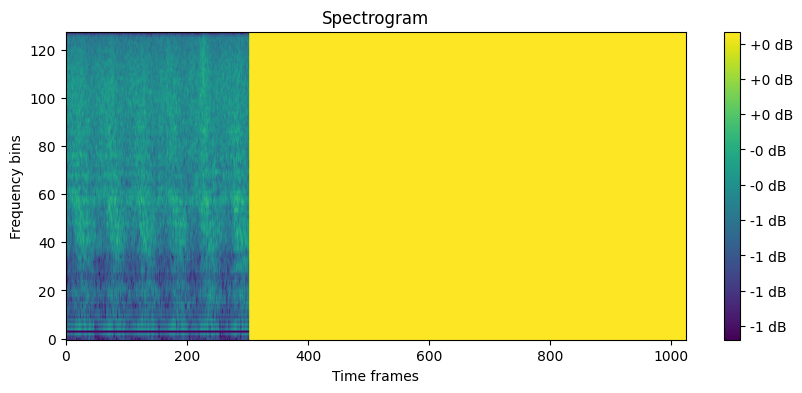

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

folder = "./noise_data_cache/"
file = folder + random.choice(os.listdir(folder))
noise_feature = np.load(file)
noise_feat = noise_feature
noise_feature = processor(noise_feature, sampling_rate=16000, return_tensors="pt")

noise_spectrogram = noise_feature["input_values"][0].numpy()
plt.figure(figsize=(10, 4))
plt.imshow(noise_spectrogram.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylabel('Frequency bins')
plt.xlabel('Time frames')
plt.show()

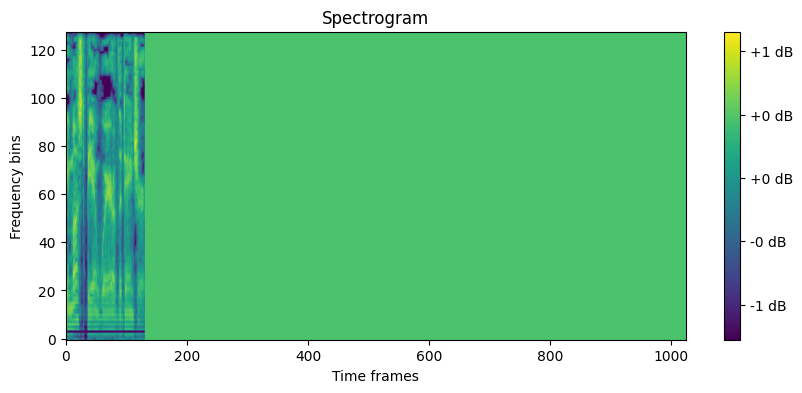

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

folder = "./wav_cache/"
file = folder + random.choice(os.listdir(folder))
real_feature = np.load(file)
real_feat = real_feature
real_feature = processor(real_feature, sampling_rate=16000, return_tensors="pt")

real_spectrogram = real_feature["input_values"][0].numpy()
plt.figure(figsize=(10, 4))
plt.imshow(real_spectrogram.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylabel('Frequency bins')
plt.xlabel('Time frames')
plt.show()

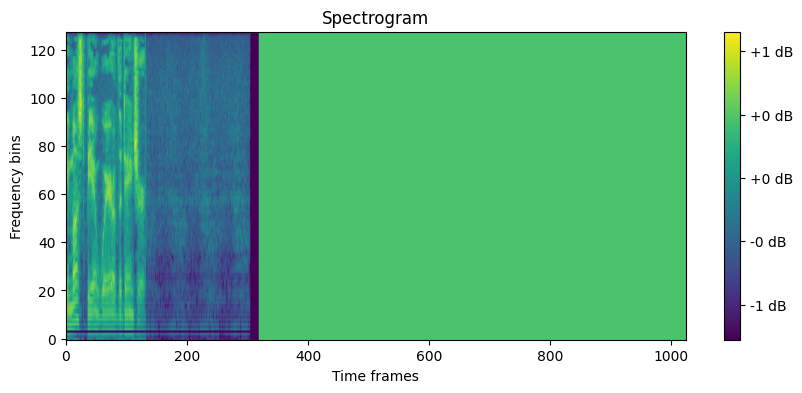

In [124]:
# concat_feature = np.concatenate((real_feat,noise_feat),axis=0)
concat_feature = pad_or_truncate_sequence(real_feat,51200) + pad_or_truncate_sequence(noise_feat,51200)
concat_feature = processor(concat_feature, sampling_rate=16000, return_tensors="pt")

concat_spectrogram = concat_feature["input_values"][0].numpy()
plt.figure(figsize=(10, 4))
plt.imshow(concat_spectrogram.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylabel('Frequency bins')
plt.xlabel('Time frames')
plt.show()

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import tqdm

folder = "./wav_cache/"
for file_name in tqdm.tqdm(os.listdir(folder)):
    if os.path.isfile("./spectrogram/" + file_name):
        continue
    if file_name.endswith(".json"):
        continue
    file = folder + file_name
    feature = np.load(file)
    feature = processor(feature, sampling_rate=16000, return_tensors="pt")
    np.save("./spectrogram/" + file_name,feature["input_values"][0].numpy())
    

 95%|█████████▌| 100575/105439 [09:11<00:17, 279.88it/s]

cached.json


100%|██████████| 105439/105439 [09:28<00:00, 185.47it/s]


In [133]:
folder = "./noise_data_cache/"
for file_name in tqdm.tqdm(os.listdir(folder)):
    file = folder + file_name
    feature = np.load(file)
    try:
        feature = processor(feature, sampling_rate=16000, return_tensors="pt")
    except:
        continue
    np.save("./spectrogram/" + file_name.replace(" ",""),feature["input_values"][0].numpy())

  1%|          | 169/21885 [00:00<01:45, 205.44it/s]

quiet _ 1575375690278_226_1.npy


  8%|▊         | 1700/21885 [00:07<01:32, 218.87it/s]

TV _ 1530710052627_5_1.npy


 16%|█▌        | 3512/21885 [00:15<01:14, 246.37it/s]

Dishwasher _ 1530019160246_4_5.npy
quiet _ 1575375690278_226_5.npy


 19%|█▉        | 4209/21885 [00:18<01:08, 258.31it/s]

quiet _ 1575375690278_226_2.npy


 24%|██▍       | 5323/21885 [00:24<01:07, 244.26it/s]

quiet _ 1575375808012_226_3.npy
Dishwasher _ 1530019160246_4_3.npy


 31%|███       | 6716/21885 [00:29<00:47, 316.20it/s]

TV _ 1530710052627_5_3.npy


 33%|███▎      | 7205/21885 [00:31<00:47, 311.53it/s]

quiet _ 1575375690278_226_4.npy


 34%|███▍      | 7504/21885 [00:32<00:43, 329.27it/s]

TV _ 1530710052627_5_2.npy


 41%|████      | 8882/21885 [00:36<00:39, 332.82it/s]

TV _ 1530710052627_5_4.npy


 46%|████▋     | 10137/21885 [00:40<00:36, 323.04it/s]

Dishwasher _ 1530019160246_4_1.npy


 53%|█████▎    | 11524/21885 [00:45<00:32, 315.42it/s]

quiet _ 1575375808012_226_1.npy


 55%|█████▌    | 12087/21885 [00:47<00:30, 319.21it/s]

TV _ 1530710052627_5_5.npy


 61%|██████    | 13352/21885 [00:51<00:33, 258.22it/s]

quiet _ 1575375690278_226_3.npy


 67%|██████▋   | 14683/21885 [00:55<00:21, 333.64it/s]

Dishwasher _ 1530019160246_4_4.npy


 81%|████████▏ | 17808/21885 [01:15<00:26, 155.91it/s]

quiet _ 1575375808012_226_5.npy


 83%|████████▎ | 18082/21885 [01:17<00:29, 127.06it/s]

quiet _ 1575375808012_226_2.npy


 83%|████████▎ | 18196/21885 [01:18<00:22, 163.98it/s]

quiet _ 1575375808012_226_4.npy


 88%|████████▊ | 19364/21885 [01:26<00:17, 146.43it/s]

Dishwasher _ 1530019160246_4_2.npy


100%|██████████| 21885/21885 [01:38<00:00, 222.75it/s]


In [7]:
folder = "./kaggle_data_cache/"
for file_name in tqdm.tqdm(os.listdir(folder)):
    file = folder + file_name
    feature = np.load(file)
    try:
        feature = processor(feature, sampling_rate=16000, return_tensors="pt")
    except:
        print(file_name)
        continue
    np.save("./spectrogram/" + file_name.replace(" ",""),feature["input_values"][0].numpy())

100%|██████████| 16464/16464 [00:49<00:00, 329.83it/s]


In [134]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
noise_data_list = os.listdir("./noise_data_cache")
preprocessed_noise_data_list = []
for file_name in noise_data_list:
    if file_name.replace(" ","") in ["quiet_1575375690278_226_1.npy","TV_1530710052627_5_1.npy", "Dishwasher_1530019160246_4_5.npy", "quiet_1575375690278_226_5.npy","quiet_1575375690278_226_2.npy","quiet_1575375808012_226_3.npy",
    "Dishwasher_1530019160246_4_3.npy",
    "TV_1530710052627_5_3.npy",
    "quiet_1575375690278_226_4.npy",
    "TV_1530710052627_5_2.npy",
    "TV_1530710052627_5_4.npy",
    "Dishwasher_1530019160246_4_1.npy",
    "quiet_1575375808012_226_1.npy",
    "TV_1530710052627_5_5.npy",
    "quiet_1575375690278_226_3.npy",
    "Dishwasher_1530019160246_4_4.npy",
    "quiet_1575375808012_226_5.npy",
    "quiet_1575375808012_226_2.npy",
    "quiet_1575375808012_226_4.npy",
    "Dishwasher_1530019160246_4_2.npy"
    ]:
        continue
    
    preprocessed_noise_data_list.append(file_name.replace(" ",""))

In [142]:
import pandas as pd

new_df = pd.DataFrame(columns=["id", "label"])
data = []
for index, row in train_df.iterrows():
    data.append({"id": row["id"], "label": row["label"]})
for noise_file in preprocessed_noise_data_list:
    data.append({"id": noise_file[:-4], "label": "noise"})
new_df = pd.concat([new_df, pd.DataFrame(data)], ignore_index=True)
new_df.to_csv("./data/new_train_data.csv", index=False)
